In [1]:
#### Library importation #####
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
## importing useful libraries for the analysis and the study of the signal 
from tools import *
from plotting_functions import *

from scipy.signal import hilbert, chirp, find_peaks
from scipy import signal 
from SSA_class import SSA

import scipy.interpolate as inter



-----------------------------------------------------------------------------------------------------------

### Remarks:

Spectral analysis of the signal didn't give valuable information, however we could extract the larger movement using Singular value decomposition.


At the end, there is an analysis of the noise signal related to motive software and attempted to substract the noise signal from the current signal, however the work is still not finished.
I didn't find a very easy way to substract the noise from the general signal, maybe use adaptive filtering ?

--------------------------------------------------------------------------------------------------------


In [2]:
### We can start by extracting the data : 
data = {}
data_per_subject = {}
data_seg = {}
data_seg_per_subject = {}
## for 3 segmented 2,3,6,7;
## for 4 segmented 1,3,4,5,6;
## for 7 segmented 1,3,4,6,7;
## for 2 segmented 1,3,4,6,7;
## for 11 segmented 1,3,4,5;
list_runs = [[2,3,6,7],[1,3,4,5,6],[1,3,4,6,7],[1,3,4,5],[1,3,6,7]]
list_subjects = [3,4,2,11,7]
for k, i in enumerate(list_subjects): 
    for j in list_runs[k]:
        data_per_subject[f'run{j}'] = pd.read_csv(f'.\sample_data_subject_{i}\optitrack_run_{j}.csv', sep = ';')
        data_seg_per_subject[f'run{j}'] = pd.read_csv(f'.\sample_data_subject_{i}\segmented\optitrack_run{j}_seg.csv', sep = ';')
    data_seg[f'subject{i}'] = data_seg_per_subject.copy()
    data[f'subject{i}'] = data_per_subject.copy()

In [3]:
data_seg['subject2']['run1'].head()


index  relative_time  absolute_time  tweezer_x  tweezer_y  tweezer_z  \
0   9216    15498.80833     1654608277   0.525408   0.131697   0.285682   
1   9219    15498.83333     1654608277   0.525500   0.131706   0.285841   
2   9220    15498.84167     1654608277   0.525536   0.131717   0.285896   
3   9226    15498.89167     1654608277   0.525575   0.131719   0.285912   
4   9227    15498.90000     1654608277   0.525577   0.131723   0.285891   

   tweezer_qx  tweezer_qy  tweezer_qz  tweezer_qw  ...  scissors_qz  \
0   -0.187719   -0.628606   -0.050626   -0.753029  ...            0   
1   -0.187855   -0.628280   -0.051840   -0.753185  ...            0   
2   -0.188454   -0.628240   -0.051954   -0.753061  ...            0   
3   -0.189687   -0.627287   -0.052367   -0.753517  ...            0   
4   -0.189577   -0.627205   -0.052333   -0.753615  ...            0   

   scissors_qw  needle_holder2_x  needle_holder2_y  needle_holder2_z  \
0            0          0.560831          0.139007          0.137737   
1            0          0.560673          0.139004          0.137789   
2            0          0.560715          0.139012          0.137828   
3            0          0.560762          0.139048          0.138217   
4            0          0.560766          0.139044          0.138236   

   needle_holder2_qx  needle_holder2_qy  needle_holder2_qz  needle_holder2_qw  \
0          -0.129289           0.361013          -0.046537          -0.922382   
1          -0.129249           0.361557          -0.046667          -0.922168   
2          -0.129301           0.361480          -0.046315          -0.922208   
3          -0.130185           0.362434          -0.045120          -0.921769   
4          -0.130189           0.362370          -0.045249          -0.921787   

   absolute_time_new  
0         1654608275  
1         1654608275  
2         1654608275  
3         1654608275  
4         1654608275  

[5 rows x 25 columns]

In [4]:
####We will work in the beginning with the subject 2: 
data_clean = {}
tools = ['tweezer', 'needle_holder2']
sub_name = 'subject2'
run = 'run2'
time_step = 1/120

data_clean[run] = delete_zero_lines(data_seg[sub_name],run,tools)
times, interpolated = interpolation(data_clean , run, tools, frequency = 120)
trajectory = {}
velocity = {}
for tool in tools:
    trajectory[tool] = interpolated[tool].copy()
    velocity[tool] = Central_differentiation(trajectory[tool], time_step, order = 'first')
    

The first order derivation was computed
The first order derivation was computed


We notice that with the periodogram we don't necessary get a useful information, from both the two tools we can see that the frequency peaks are not very


Spectral study for the subject2 using tweezer


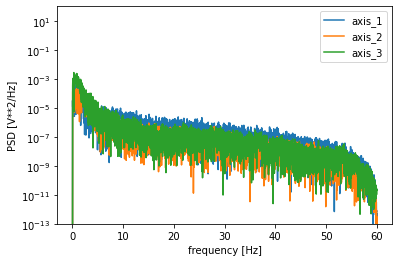

This is the colormesh metric for the axis_1: PSD over time


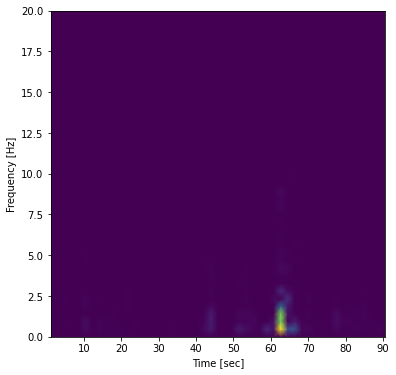

This is the colormesh metric for the axis_2: PSD over time


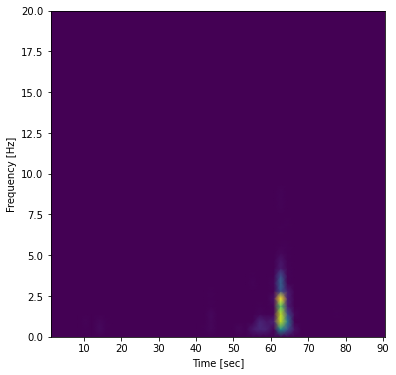

This is the colormesh metric for the axis_3: PSD over time


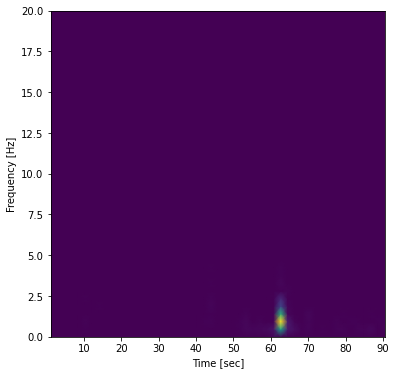

Spectral study for the subject2 using needle_holder2


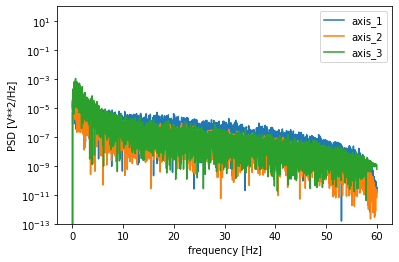

This is the colormesh metric for the axis_1: PSD over time


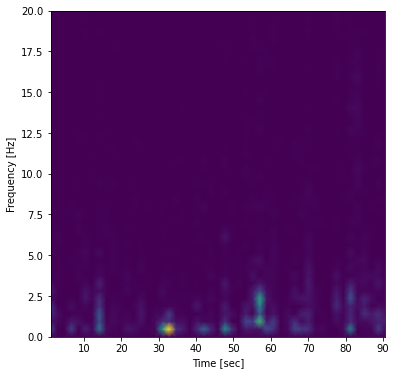

This is the colormesh metric for the axis_2: PSD over time


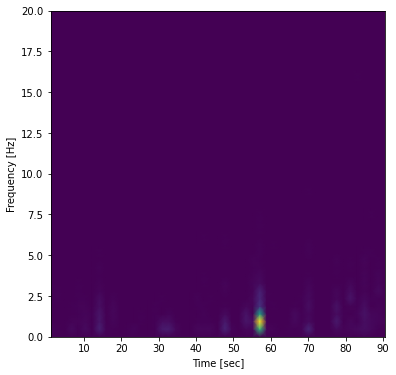

This is the colormesh metric for the axis_3: PSD over time


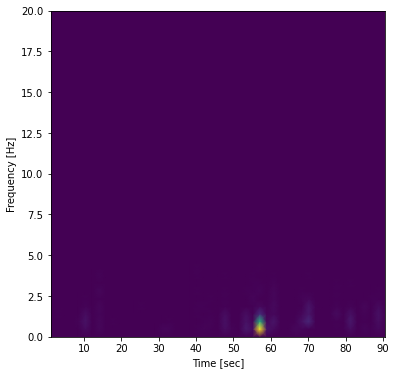

In [55]:
##We can here try to explore the use of a spectrogram to asses the modification of the signal over time :
f = {}
t = {}
Sxx = {}
sub_name = 'subject2'
for tool in tools:
    print(f'Spectral study for the {sub_name} using {tool}')
    plotting_periodgram_spectrogram(tool, velocity)


Using a spectral approach may not be the best option that we can get, We can try with the other methods to be able to see the spectral fluctuation  

In [59]:
## we will try to use the similar approach with subject 4 and subject 7 : 
data_clean = {}
tools = ['tweezer', 'needle_holder2']
sub_name = 'subject4'
run = 'run3'
time_step = 1/120

data_clean[run] = delete_zero_lines(data_seg[sub_name],run,tools)
times_1, interpolated = interpolation(data_clean , run, tools, frequency = 120)
trajectory_1 = {}
velocity_1 = {}
for tool in tools:
    trajectory_1[tool] = interpolated[tool].copy()
    velocity_1[tool] = Central_differentiation(trajectory_1[tool], time_step, order = 'first')

The first order derivation was computed
The first order derivation was computed


Computing the Periodogram  subject 4 signal: 
Spectral study for the subject4 using tweezer


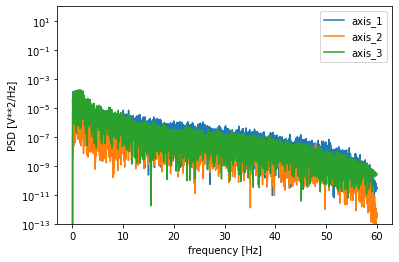

This is the colormesh metric for the axis_1: PSD over time


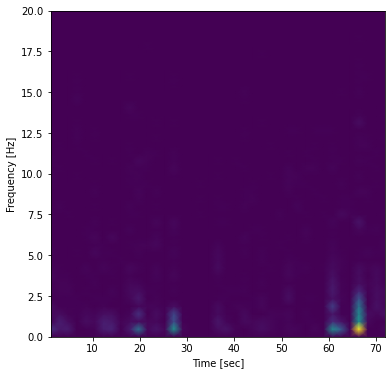

This is the colormesh metric for the axis_2: PSD over time


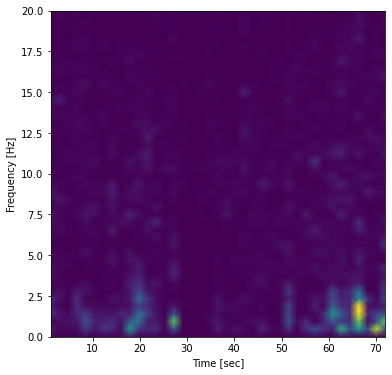

This is the colormesh metric for the axis_3: PSD over time


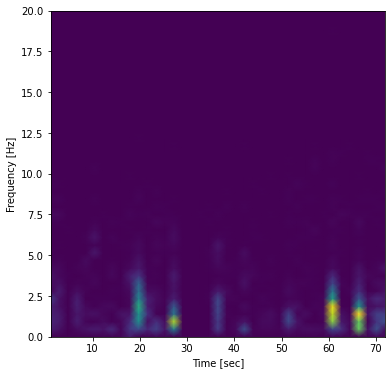

Spectral study for the subject4 using needle_holder2


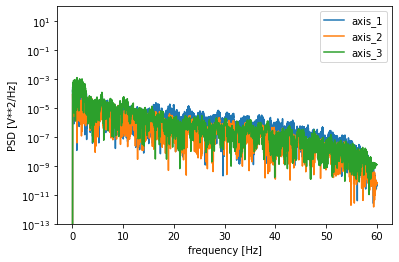

This is the colormesh metric for the axis_1: PSD over time


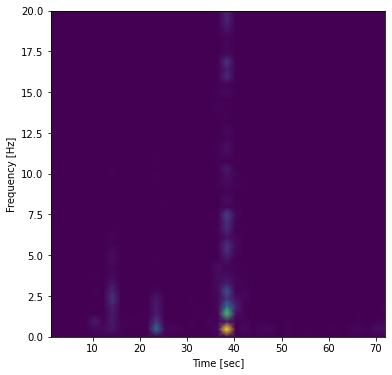

This is the colormesh metric for the axis_2: PSD over time


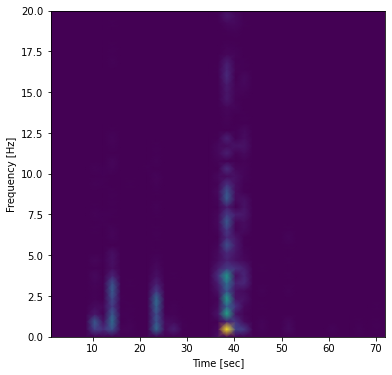

This is the colormesh metric for the axis_3: PSD over time


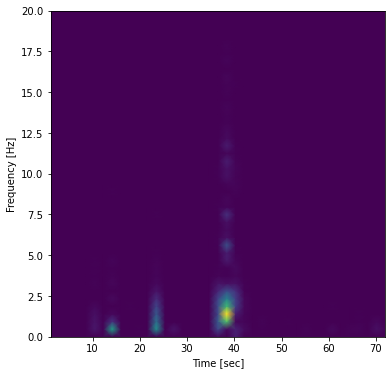

In [60]:
## We will try to extract a power spectral density graph from our signal:
print('Computing the Periodogram  subject 4 signal: ')
sub_name = 'subject4'
for tool in tools:
    print(f'Spectral study for the {sub_name} using {tool}')
    plotting_periodgram_spectrogram(tool, velocity_1)

The first order derivation was computed
The first order derivation was computed
Spectral study for the subject7 using tweezer


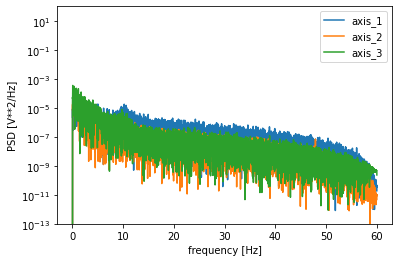

This is the colormesh metric for the axis_1: PSD over time


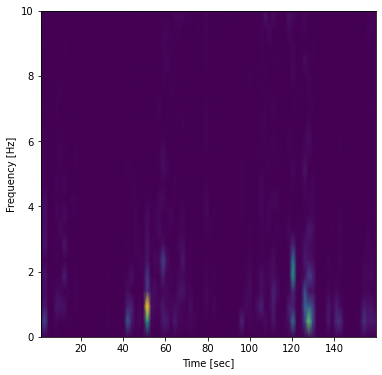

This is the colormesh metric for the axis_2: PSD over time


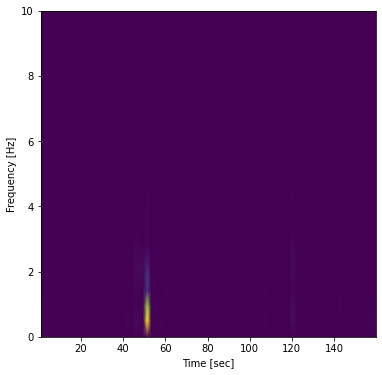

This is the colormesh metric for the axis_3: PSD over time


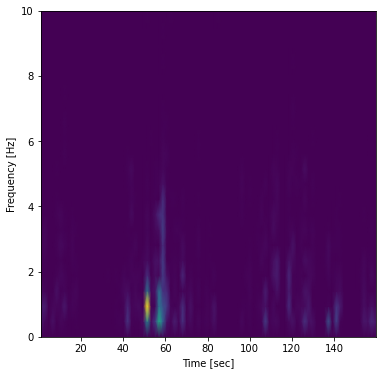

Spectral study for the subject7 using needle_holder2


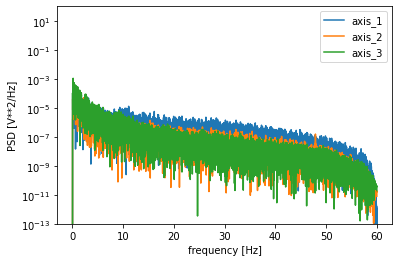

This is the colormesh metric for the axis_1: PSD over time


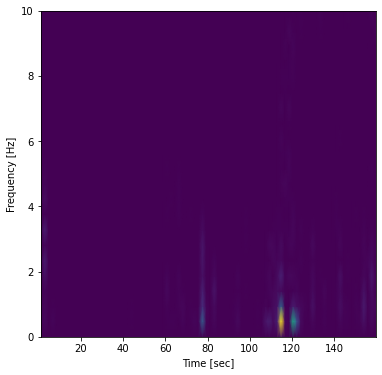

This is the colormesh metric for the axis_2: PSD over time


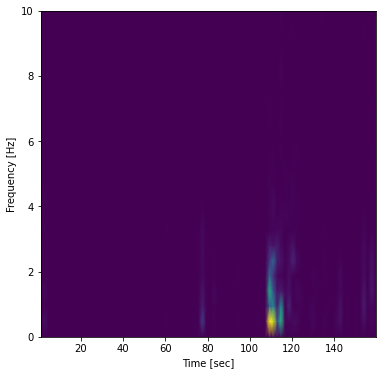

This is the colormesh metric for the axis_3: PSD over time


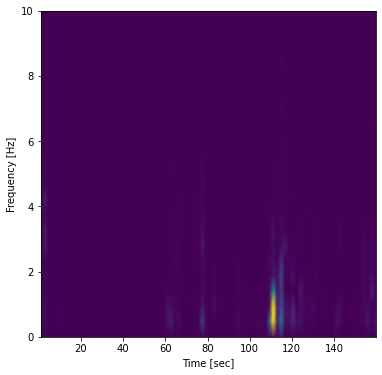

In [62]:
sub_name = 'subject7'
run = 'run3'
data_clean[run] = delete_zero_lines(data_seg[sub_name],run,tools)
times_2, interpolated = interpolation(data_clean , run, tools, frequency = 120)
trajectory_2 = {}
velocity_2 = {}
for tool in tools:
    trajectory_2[tool] = interpolated[tool].copy()
    velocity_2[tool] = Central_differentiation(trajectory_2[tool], time_step, order = 'first')
for tool in tools:
    print(f'Spectral study for the {sub_name} using {tool}')
    plotting_periodgram_spectrogram(tool, velocity_2, limit= 10 )

The first order derivation was computed
The first order derivation was computed
Spectral study for the subject7 using tweezer for run2


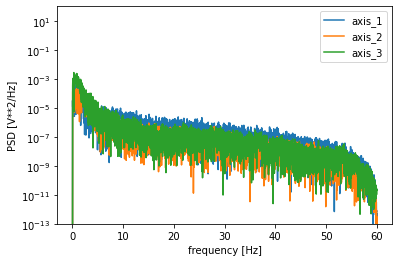

This is the colormesh metric for the axis_1: PSD over time


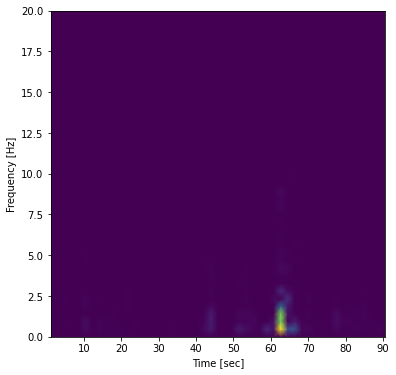

This is the colormesh metric for the axis_2: PSD over time


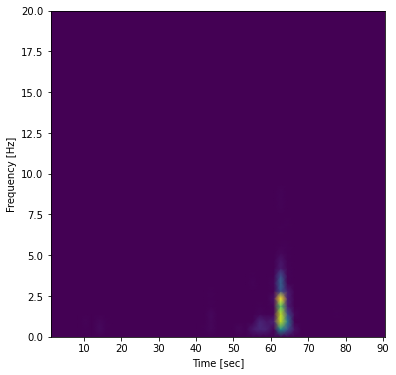

This is the colormesh metric for the axis_3: PSD over time


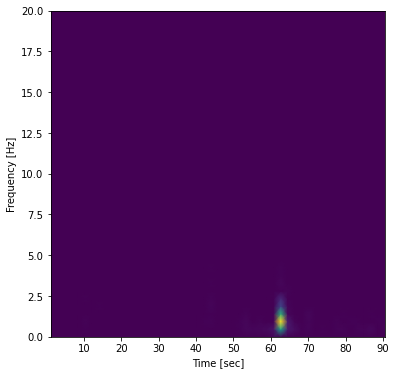

Spectral study for the subject7 using needle_holder2 for run2


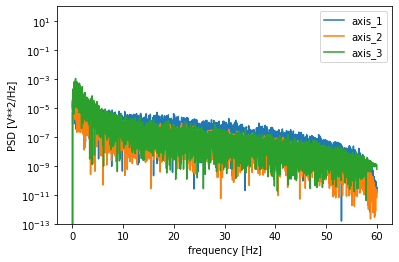

This is the colormesh metric for the axis_1: PSD over time


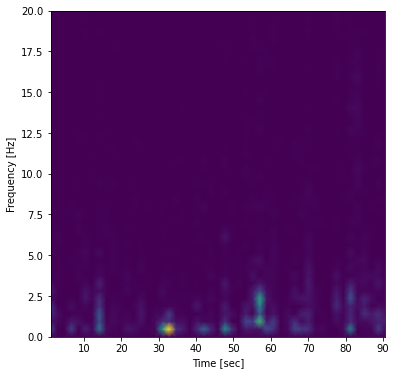

This is the colormesh metric for the axis_2: PSD over time


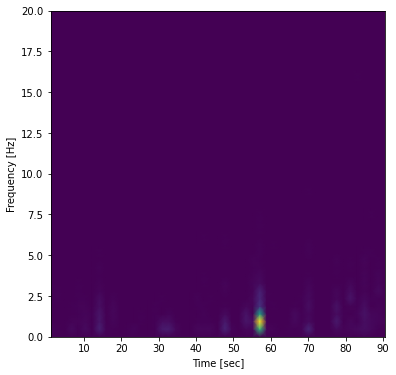

This is the colormesh metric for the axis_3: PSD over time


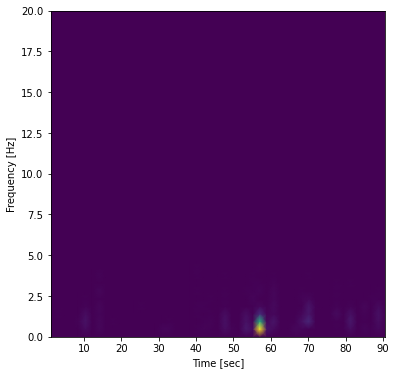

In [41]:
## If we study another run for the same subject : 
sub_name = 'subject7'
run = 'run2'
data_clean[run] = delete_zero_lines(data_seg[sub_name],run,tools)
times_2, interpolated = interpolation(data_clean , run, tools, frequency = 120)
trajectory_2 = {}
velocity_2 = {}
for tool in tools:
    trajectory_2[tool] = interpolated[tool].copy()
    velocity_2[tool] = Central_differentiation(trajectory_2[tool], time_step, order = 'first')
for tool in tools:
    print(f'Spectral study for the {sub_name} using {tool} for {run}')
    plotting_periodgram_spectrogram(tool, velocity_2)


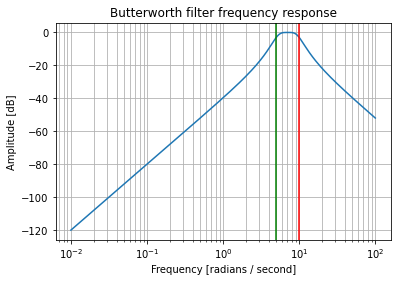

Spectral study for the subject7 using tweezer for run3, filtered signal


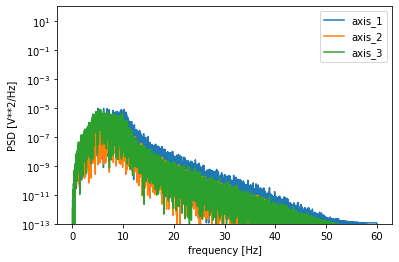

This is the colormesh metric for the axis_1: PSD over time


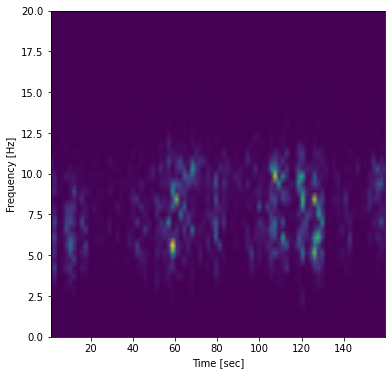

This is the colormesh metric for the axis_2: PSD over time


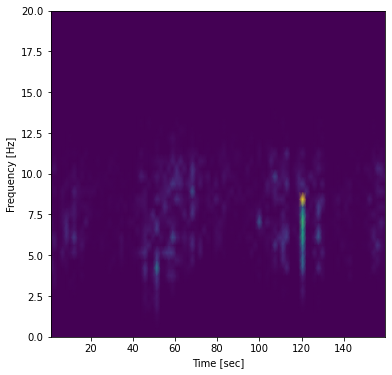

This is the colormesh metric for the axis_3: PSD over time


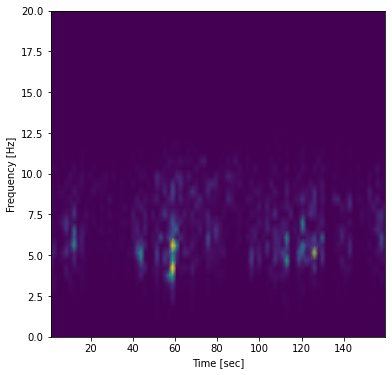

Spectral study for the subject7 using needle_holder2 for run3, filtered signal


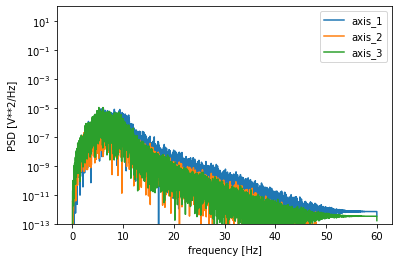

This is the colormesh metric for the axis_1: PSD over time


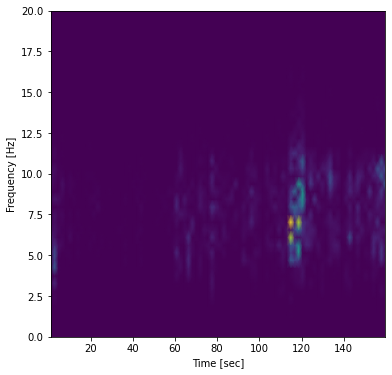

This is the colormesh metric for the axis_2: PSD over time


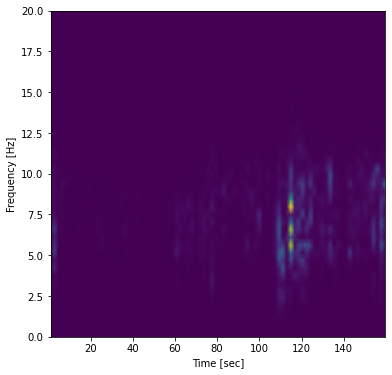

This is the colormesh metric for the axis_3: PSD over time


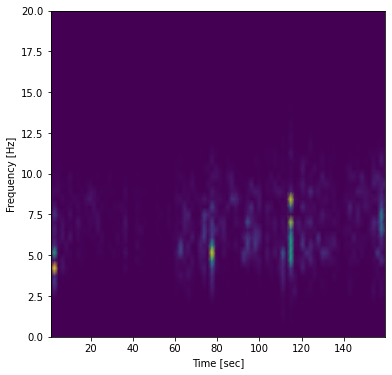

In [63]:
### If we filter one of the signals we will have : 
sos_1 = filter_design_plotting(5, 10, order = 10)
filtered = {}
for tool in tools:
    filtered[tool] = np.zeros(np.shape(velocity_2[tool]))
    for i in range(3):
        filtered[tool][:,i] = signal.sosfilt(sos_1, velocity_2[tool][:,i])
    print(f'Spectral study for the {sub_name} using {tool} for {run}, filtered signal')
    plotting_periodgram_spectrogram(tool, filtered)


#### We notice that we are studying an upper part of the signal and that we can try to confirm suitability of the filter bounderies using the singular value decomposition, because here we cannot extract 

In [61]:
def plotting_periodgram_spectrogram(tool, velo, limit = 20):
    
    f = {}
    Pxx_den = {}
    fs = 120
    for i in range(3):  
        label = f'axis_{i+1}'
        f[label], Pxx_den[label] = signal.periodogram(velo[tool][:,i], fs)
    plotting_PSD_graph_3_axis(f,Pxx_den)
    ##We can here try to explore the use of a spectrogram to asses the modification of the signal over time :
    f = {}
    t = {}
    Sxx = {}
    for i in range(3):  
        label = f'axis_{i+1}'
        f[label], t[label] , Sxx[label]= signal.spectrogram(velo[tool][:,i], fs)
        print(f'This is the colormesh metric for the {label}: PSD over time')
        plt.figure(figsize = (6,6))
        plt.pcolormesh(t[label], f[label], Sxx[label], shading='gouraud')
        plt.ylim([0,limit])
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()

In [43]:
def filter_design_plotting(cutfreq_1, cutfreq_2, order = 2):
    order = 2
    sos = signal.butter(order, [cutfreq_1,cutfreq_2],'bp', fs=120, output='sos')
    design_filter_bp(order,cutfreq_1,cutfreq_2)
    return sos

## We can study here the Singular Value decomposition of the optitrack signals (Using some preexisting python libraries)

In [26]:
# we will follow a similar procedure, however we need to get the windows size and the Singular Spectral Analysis order :

## Computing the euclidien distance for the trajectory of the tool:

sub_name = 'subject7'
run = 'run1'
tools = ['tweezer', 'needle_holder2']

test_data = data_seg[sub_name].copy()

test_data = delete_zero_lines(test_data, run,tools)



test_data.head()


index  relative_time  absolute_time  tweezer_x  tweezer_y  tweezer_z  \
0   8978    12384.30833     1654769126   0.312168   0.108558   0.224769   
1   8981    12384.33333     1654769126   0.312247   0.108523   0.224623   
2   8983    12384.35000     1654769126   0.312261   0.108533   0.224457   
3   8986    12384.37500     1654769126   0.312276   0.108578   0.224347   
4   8989    12384.40000     1654769126   0.312274   0.108613   0.224281   

   tweezer_qx  tweezer_qy  tweezer_qz  tweezer_qw  ...  scissors_qz  \
0   -0.240544   -0.404171    0.015876   -0.882345  ...          0.0   
1   -0.239963   -0.404027    0.015822   -0.882570  ...          0.0   
2   -0.239620   -0.404098    0.015707   -0.882632  ...          0.0   
3   -0.239153   -0.404236    0.015730   -0.882696  ...          0.0   
4   -0.239252   -0.403934    0.016444   -0.882794  ...          0.0   

   scissors_qw  needle_holder2_x  needle_holder2_y  needle_holder2_z  \
0          0.0          0.351060          0.105046          0.015639   
1          0.0          0.351063          0.105040          0.015620   
2          0.0          0.351131          0.105022          0.015642   
3          0.0          0.351114          0.104982          0.015696   
4          0.0          0.351020          0.104985          0.015730   

   needle_holder2_qx  needle_holder2_qy  needle_holder2_qz  needle_holder2_qw  \
0           0.077258           0.071290          -0.254538           0.961332   
1           0.077106           0.071247          -0.254453           0.961370   
2           0.077323           0.071295          -0.254757           0.961268   
3           0.077591           0.071550          -0.254675           0.961250   
4           0.077740           0.071573          -0.254610           0.961253   

   absolute_time_new  
0         1654769124  
1         1654769124  
2         1654769124  
3         1654769124  
4         1654769124  

[5 rows x 25 columns]

In [27]:
print(len(test_data), test_data['relative_time'].max()-test_data['relative_time'].min())

print(len(test_data)/2, (test_data['relative_time'].max()-test_data['relative_time'].min())/2)


7375 168.16667000000052
3687.5 84.08333500000026


In [28]:
### Compute euclidien distance for tweezers:



cols = ['tweezer_x','tweezer_y','tweezer_z']

euclidien_distance_tweezer = (test_data[cols]**2).sum(axis = 1)**0.5

Interpole = inter.interp1d(test_data['relative_time'],euclidien_distance_tweezer)

time_step = 1/120 

time_vector = np.arange(test_data['relative_time'].min(),test_data['relative_time'].max(),time_step)

inter_eul_tweezer = Interpole(time_vector)


time_vector = time_vector - time_vector.min()




data_new = pd.Series(inter_eul_tweezer, name = 'Tweezer')

data_new.index /=120

data_new.head()

0.000000    0.399693
0.008333    0.399683
0.016667    0.399673
0.025000    0.399663
0.033333    0.399624
Name: Tweezer, dtype: float64

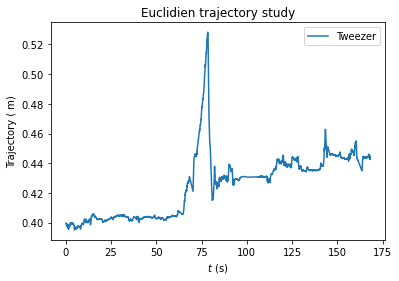

In [29]:
data_new.plot()
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory ( m)")
plt.title("Euclidien trajectory study");
plt.legend()

### We are not really sure about the periodicity of our signal but we are looking for trends 

In [31]:
start = 1
end = 155
window = 500

euclid_ssa = SSA(data_new.loc[start:end], window)

Text(0.5, 1.0, 'W-Correlation for data')

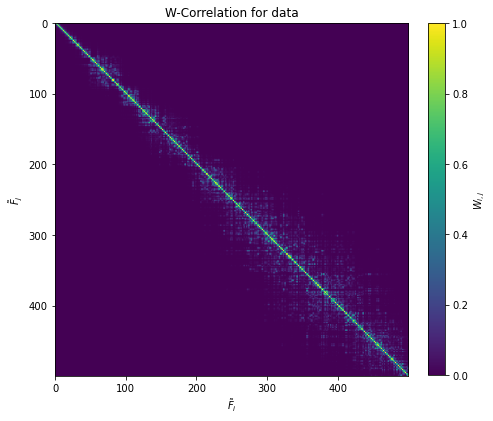

In [14]:
plot_wcorr(euclid_ssa)
plt.title('W-Correlation for data')

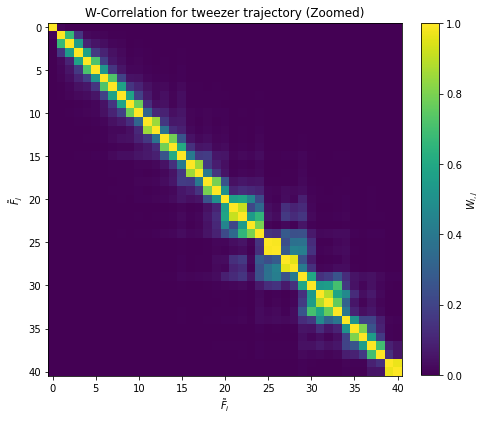

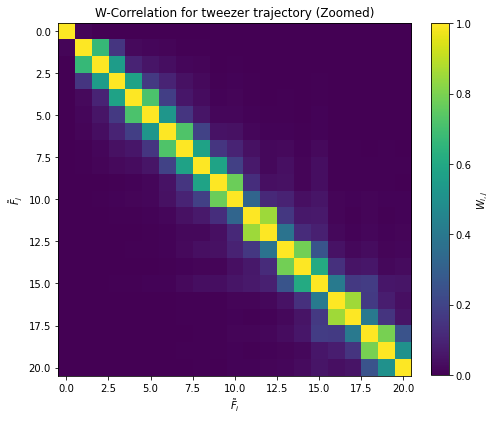

In [51]:
## We will try to get a better Zoom: 

plot_wcorr(euclid_ssa, max = 40)
plt.title('W-Correlation for tweezer trajectory (Zoomed)')
plt.show()
plot_wcorr(euclid_ssa, max = 20)
plt.title('W-Correlation for tweezer trajectory (Zoomed)')
plt.show()

In [30]:
## We can try to reconstrucct the signal with the first 5 groups  and see :
plt.figure(figsize = (7,7))
euclid_ssa.reconstruct(0).plot()
euclid_ssa.reconstruct([1,2,3]).plot()
euclid_ssa.reconstruct([4,5,6]).plot()
euclid_ssa.orig_TS.plot(alpha=0.4)
plt.title('Time Series for subject 7 with the few first groups for tweezer')
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory (m)")
#plt.ylim(-0.03, 0.04)
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i) for i in range(3)] + ["Original TS"]
plt.legend(legend);

NameError: name 'euclid_ssa' is not defined

<Figure size 504x504 with 0 Axes>

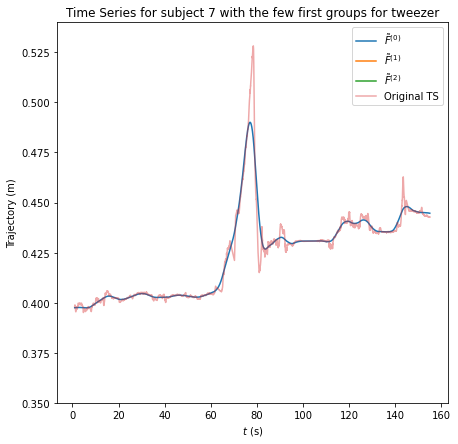

In [53]:
plt.figure(figsize = (7,7))
euclid_ssa.reconstruct(0).plot()
euclid_ssa.reconstruct([1,2,3]).plot()
euclid_ssa.reconstruct([4,5,6]).plot()
euclid_ssa.orig_TS.plot(alpha=0.4)
plt.title('Time Series for subject 7 with the few first groups for tweezer')
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory (m)")
plt.ylim(0.35, 0.54)
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i) for i in range(3)] + ["Original TS"]
plt.legend(legend);

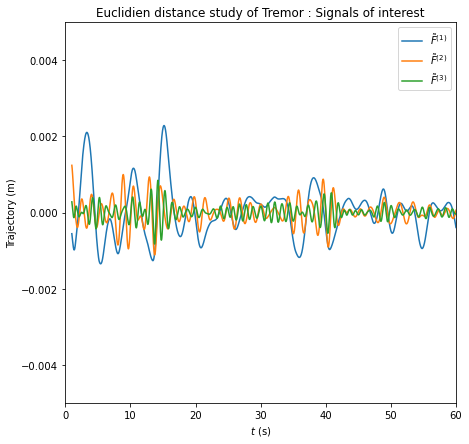

In [50]:
plt.figure(figsize = (7,7))
euclid_ssa.reconstruct([1,2,3]).plot()
euclid_ssa.reconstruct([4,5,6]).plot()
euclid_ssa.reconstruct([7,8,9]).plot()
plt.title("Euclidien distance study of Tremor : Signals of interest")
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory (m)")
plt.xlim(0,60)
plt.ylim(-0.005,0.005)
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i+1) for i in range(3)]
plt.legend(legend)
plt.show()

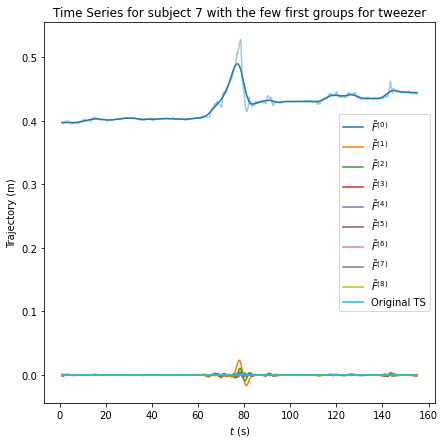

In [55]:
## Exploring the first elements seperately :
plt.figure(figsize = (7,7))
for i in range(10):
    euclid_ssa.reconstruct(i).plot()
euclid_ssa.orig_TS.plot(alpha=0.4)
plt.title('Time Series for subject 7 with the few first groups for tweezer')
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory (m)")
#plt.ylim(0.35, 0.54)
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i) for i in range(i)] + ["Original TS"]
plt.legend(legend);






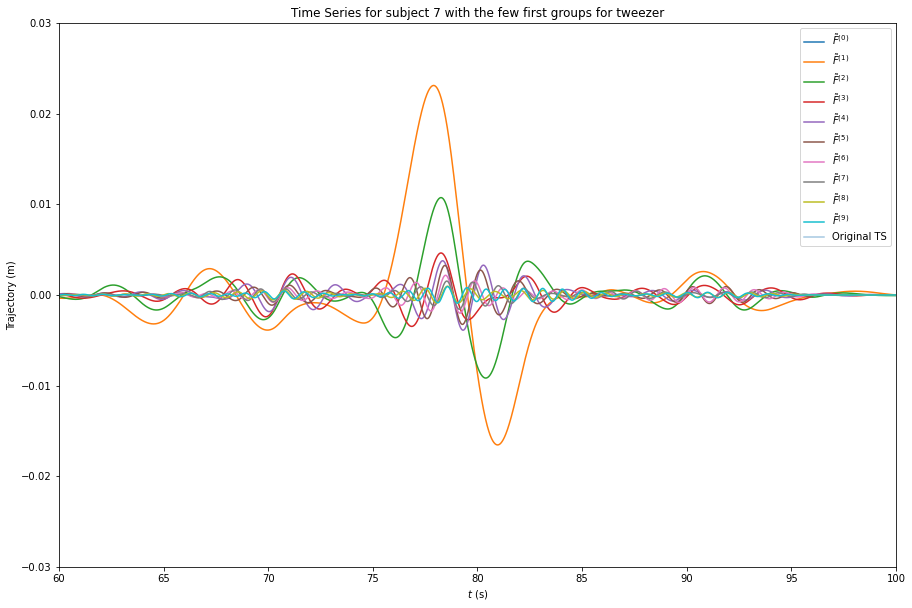

In [60]:
plt.figure(figsize = (15,10))
for i in range(10):
    euclid_ssa.reconstruct(i).plot()
euclid_ssa.orig_TS.plot(alpha=0.4)
plt.title('Time Series for subject 7 with the few first groups for tweezer')
plt.xlabel(r"$t$ (s)")
plt.ylabel("Trajectory (m)")
plt.ylim(-0.03, 0.03)
plt.xlim(60,100)
legend = [r"$\tilde{{F}}^{{({0})}}$".format(i) for i in range(10)] + ["Original TS"]
plt.legend(legend);



In [13]:
 def plot_wcorr(data, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = data.d
        
        if data.Wcorr is None:
            data.calc_wcorr()
        plt.figure( figsize = (7,7))
        ax = plt.imshow(data.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == data.d:
            max_rnge = data.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)

## It could be interesting to detect the noise that is present in the signal : 

In [7]:
## Here we will use the Optitrack recordings were the tools doen't move 
noise = {}
for i in range(2):
    noise[f'trail{i}'] = pd.read_csv(f'.\\motive_noise\\Noise_Assessment_{i+1}_trail.csv', sep = ';')
noise['trail0'].head()

Frame  Time (Seconds)  needle_holder2_qx  needle_holder_2_qy  \
0      0        0.000000           0.002564            0.077438   
1      1        0.008333           0.002610            0.077537   
2      2        0.016667           0.002550            0.077440   
3      3        0.025000           0.002653            0.077509   
4      4        0.033333           0.002575            0.077497   

   needle_holder_qz  needle_holder_qw  needle_holder_x  needle_holder_y  \
0         -0.001362         -0.996993         0.165973         0.006765   
1         -0.001326         -0.996985         0.165963         0.006772   
2         -0.001345         -0.996993         0.165997         0.006753   
3         -0.001405         -0.996987         0.165968         0.006767   
4         -0.001345         -0.996988         0.165977         0.006763   

   needle_holder_z  Error_mean_needle_holde  tweezer_qx  tweezer_qy  \
0         0.376186                 0.001435    0.000799    0.037462   
1         0.376181                 0.001436    0.000791    0.037432   
2         0.376188                 0.001433    0.000762    0.037488   
3         0.376183                 0.001438    0.000788    0.037438   
4         0.376185                 0.001437    0.000800    0.037477   

   tweezer_qz  tweezer_qw  tweezer_x  tweezer_y  tweezer_z  Error_mean_tweezer  
0    0.000762   -0.999297   0.160560   0.020321   0.546168            0.001412  
1    0.000774   -0.999299   0.160547   0.020317   0.546168            0.001417  
2    0.000880   -0.999296   0.160549   0.020320   0.546169            0.001409  
3    0.000759   -0.999298   0.160533   0.020324   0.546166            0.001415  
4    0.000773   -0.999297   0.160551   0.020322   0.546174            0.001416

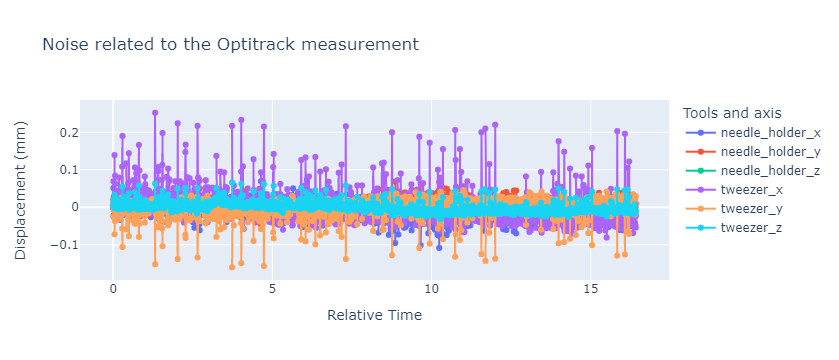

0.2522874323516444 0.02757479491553035 -0.08071256764835555


In [8]:
tools = ['needle_holder', 'tweezer']
noise_1 = noise['trail1'].copy()
step = 1
fig = go.Figure()



for tool in tools:
    for j in ['x','y','z'] :
        noise_1[tool+'_'+f'{j}'] =    noise_1[tool+'_'+f'{j}']-  noise_1[tool+'_'+f'{j}'].mean()
        
        fig.add_trace(go.Scatter(x = noise_1['Time (Seconds)'][::step], y = noise_1[tool+'_'+f'{j}'][::step]*1e3, mode = 'markers+lines', name = tool+f'_{j}'))

fig.update_layout(
        title=' Noise related to the Optitrack measurement',
        xaxis_title="Relative Time",
        yaxis_title="Displacement (mm)",
        legend_title="Tools and axis"
    )
fig.show()
print(noise_1['tweezer_x'].max()*1e3,  abs(noise_1['tweezer_x']).mean()*1e3, noise_1['tweezer_x'].min()*1e3)

The values are in accordance with the litterature about the error given by the optitrack system of 0.2-0.3 mm  worst case scenario.

Text(0, 0.5, 'Instanteneous_frequency')

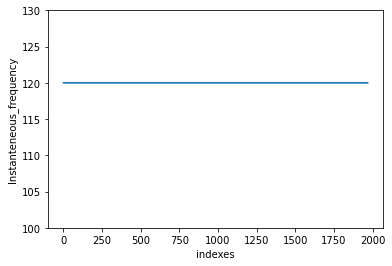

In [9]:
time_step =  np.array(noise_1['Time (Seconds)'][:-1]) - np.array(noise_1['Time (Seconds)'][1:])
frequency = (1/-time_step)
plt.plot(frequency)
plt.xlabel('indexes')
plt.ylim( 100 ,130)
plt.ylabel('Instanteneous_frequency')


In [10]:
for tool in tools:
    cols = [f'{tool}_x',f'{tool}_y',f'{tool}_z']
    noise_1[f'{tool}_euclid'] =  (noise_1[cols]**2).sum(axis = 1)**0.5

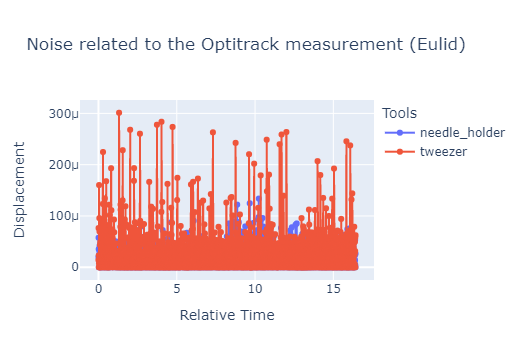

In [11]:
fig = go.Figure()

for tool in tools:
     fig.add_trace(go.Scatter(x = noise_1['Time (Seconds)'][::step], y = noise_1[tool+'_'+'euclid'][::step], mode = 'markers+lines', name = tool))

fig.update_layout(
        title=' Noise related to the Optitrack measurement (Eulid)',
        xaxis_title="Relative Time",
        yaxis_title="Displacement",
        legend_title="Tools"
    )
fig.show()

In [12]:
noise_1 = noise_1.fillna(0)
noise_1.head()

Frame  Time (Seconds)  needle_holder2_qx  needle_holder_2_qy  \
0      0        0.000000           0.002696            0.077649   
1      1        0.008333           0.002626            0.077578   
2      2        0.016667           0.002584            0.077617   
3      3        0.025000           0.000000            0.000000   
4      4        0.033333           0.002623            0.077551   

   needle_holder_qz  needle_holder_qw  needle_holder_x  needle_holder_y  \
0         -0.001277         -0.996976         0.000018        -0.000001   
1         -0.001182         -0.996982         0.000051        -0.000023   
2         -0.001198         -0.996979        -0.000022         0.000028   
3          0.000000          0.000000         0.000000         0.000000   
4         -0.001192         -0.996984         0.000011        -0.000004   

   needle_holder_z  Error_mean_needle_holde  tweezer_qx  tweezer_qy  \
0         0.000007                 0.001438    0.001063    0.039615   
1         0.000011                 0.001431    0.001187    0.039661   
2        -0.000005                 0.001445    0.001135    0.039662   
3         0.000000                 0.000000    0.000000    0.000000   
4         0.000008                 0.001440    0.001095    0.039596   

   tweezer_qz  tweezer_qw     tweezer_x  tweezer_y  tweezer_z  \
0    0.007547   -0.999186  2.874324e-07   0.000014   0.000002   
1    0.007455   -0.999185  6.928743e-05  -0.000025   0.000020   
2    0.007517   -0.999184  1.928743e-05  -0.000006   0.000011   
3    0.000000    0.000000  0.000000e+00   0.000000   0.000000   
4    0.007585   -0.999186  4.287432e-06   0.000006   0.000001   

   Error_mean_tweezer  needle_holder_euclid  tweezer_euclid  
0            0.001305              0.000020        0.000014  
1            0.001305              0.000058        0.000076  
2            0.001305              0.000035        0.000023  
3            0.000000              0.000000        0.000000  
4            0.001304              0.000015        0.000007

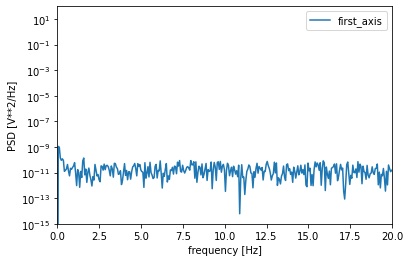

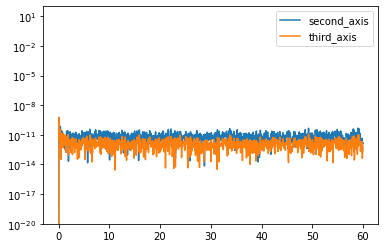

In [13]:
fs = 120
f, Pxx_den = signal.periodogram(noise_1['tweezer_x'], fs)
plotting_PSD_graph_3_axis(f,Pxx_den, axis = False)
f, Pxx_den = signal.periodogram(noise_1['tweezer_y'], fs)
plt.semilogy(f,Pxx_den, label ='second_axis')
f, Pxx_den = signal.periodogram(noise_1['tweezer_z'], fs)
plt.semilogy(f,Pxx_den, label ='third_axis')
plt.ylim([1e-20, 1e2])
plt.legend()

## In this part we will study the adaptive filter basic

In [17]:
## We start by importing the libraries
import padasip as pa 
from pandas.plotting import autocorrelation_plot



In [15]:
print(noise_1.describe())

            Frame  Time (Seconds)  needle_holder2_qx  needle_holder_2_qy  \
count  1971.00000     1971.000000        1971.000000         1971.000000   
mean    985.00000        8.208333           0.002242            0.065445   
std     569.12301        4.742692           0.000967            0.028172   
min       0.00000        0.000000           0.000000            0.000000   
25%     492.50000        4.104166           0.002586            0.077481   
50%     985.00000        8.208333           0.002641            0.077552   
75%    1477.50000       12.312500           0.002683            0.077601   
max    1970.00000       16.416667           0.003167            0.077971   

       needle_holder_qz  needle_holder_qw  needle_holder_x  needle_holder_y  \
count       1971.000000       1971.000000     1.971000e+03     1.971000e+03   
mean          -0.000971         -0.841189    -3.821848e-17     5.531576e-18   
std            0.000432          0.362104     1.908709e-05     1.278724e-05   

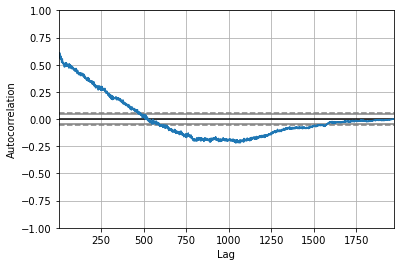

In [23]:
autocorrelation_plot(noise_1['needle_holder_z'])
plt.show()

In [33]:
print(data_new)

0.000000      0.399693
0.008333      0.399683
0.016667      0.399673
0.025000      0.399663
0.033333      0.399624
                ...   
168.133333    0.443246
168.141667    0.443635
168.150000    0.444025
168.158333    0.444414
168.166667    0.444830
Name: Tweezer, Length: 20181, dtype: float64


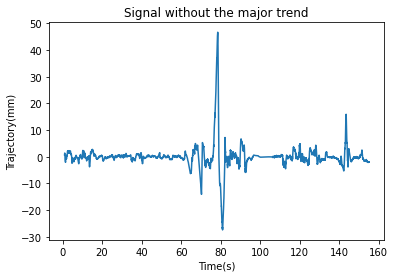

In [74]:
Data_without_trend = data_new*1e3 - euclid_ssa.reconstruct(0)*1e3

Data_without_trend.plot()
plt.title('Signal without the major trend')
plt.xlabel("Time(s)")
plt.ylabel("Trajectory(mm)")
plt.show()

In [73]:
print(Data_without_trend)

0.000000     NaN
0.008333     NaN
0.016667     NaN
0.025000     NaN
0.033333     NaN
              ..
168.133333   NaN
168.141667   NaN
168.150000   NaN
168.158333   NaN
168.166667   NaN
Length: 20181, dtype: float64
